In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [7]:
url="https://raw.githubusercontent.com/garzuzo/ai-talk/main/datasets/peliculas.csv"
movies=pd.read_csv(url)

In [11]:
type(movies)

pandas.core.frame.DataFrame

In [10]:
movies.head()

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,169.0,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,Color,2.35,148.0,English,UK,148.0,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11700,245000000.0,6.8,200074175.0
3,The Dark Knight Rises,2012.0,Color,2.35,164.0,English,USA,164.0,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,106759,250000000.0,8.5,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,143,NaN,7.1,NaN


In [12]:
movies.shape

(5043, 19)

In [13]:
movies.columns

Index(['movie_title', 'title_year', 'color', 'aspect_ratio', 'duration',
       'language', 'country', 'duration.1', 'genres', 'content_rating',
       'plot_keywords', 'director_name', 'actor_1_name', 'actor_2_name',
       'actor_3_name', 'cast_total_facebook_likes', 'budget', 'imdb_score',
       'gross'],
      dtype='object')

In [14]:
movies.index

RangeIndex(start=0, stop=5043, step=1)

In [15]:
columna1 = movies['movie_title']
columna1.head()

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

In [17]:
movies.loc[0:2,'movie_title']

0                                      Avatar 
1    Pirates of the Caribbean: At World's End 
2                                     Spectre 
Name: movie_title, dtype: object

In [19]:
fila = movies.loc[10,:]
fila

movie_title                                Batman v Superman: Dawn of Justice 
title_year                                                                2016
color                                                                    Color
aspect_ratio                                                              2.35
duration                                                                   183
language                                                               English
country                                                                    USA
duration.1                                                                 183
genres                                                 Action|Adventure|Sci-Fi
content_rating                                                           PG-13
plot_keywords                based on comic book|batman|sequel to a reboot|...
director_name                                                      Zack Snyder
actor_1_name                                        

In [20]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                5043 non-null   object 
 1   title_year                 4935 non-null   float64
 2   color                      5024 non-null   object 
 3   aspect_ratio               4714 non-null   float64
 4   duration                   5028 non-null   float64
 5   language                   5031 non-null   object 
 6   country                    5038 non-null   object 
 7   duration.1                 5028 non-null   float64
 8   genres                     5043 non-null   object 
 9   content_rating             4740 non-null   object 
 10  plot_keywords              4890 non-null   object 
 11  director_name              4939 non-null   object 
 12  actor_1_name               5036 non-null   object 
 13  actor_2_name               5030 non-null   objec

In [22]:
num=(movies.dtypes == float)| (movies.dtypes==int)

In [24]:
nums_cols = [c for c in num.index if num[c]]
nums_cols

['title_year',
 'aspect_ratio',
 'duration',
 'duration.1',
 'cast_total_facebook_likes',
 'budget',
 'imdb_score',
 'gross']

In [25]:
movies_num = movies[nums_cols]
movies_num

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
2,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
3,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0
4,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN
...,...,...,...,...,...,...,...,...
5038,2013.0,NaN,87.0,87.0,2283,NaN,7.7,NaN
5039,NaN,16.00,43.0,43.0,1753,NaN,7.5,NaN
5040,2013.0,NaN,76.0,76.0,0,1400.0,6.3,NaN
5041,2012.0,2.35,100.0,100.0,2386,NaN,6.3,10443.0


In [26]:
movies_num.describe()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
count,4935.000000,4714.000000,5028.000000,5028.000000,5043.000000,4.551000e+03,5043.000000,4.159000e+03
mean,2002.470517,2.220403,107.201074,107.201074,9699.063851,3.975262e+07,6.442138,4.846841e+07
std,12.474599,1.385113,25.197441,25.197441,18163.799124,2.061149e+08,1.125116,6.845299e+07
min,1916.000000,1.180000,7.000000,7.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,93.000000,1411.000000,6.000000e+06,5.800000,5.340988e+06
50%,2005.000000,2.350000,103.000000,103.000000,3090.000000,2.000000e+07,6.600000,2.551750e+07
75%,2011.000000,2.350000,118.000000,118.000000,13756.500000,4.500000e+07,7.200000,6.230944e+07
max,2016.000000,16.000000,511.000000,511.000000,656730.000000,1.221550e+10,9.500000,7.605058e+08


Observemos por columna que información nos dan y notemos si hay algo anomalo

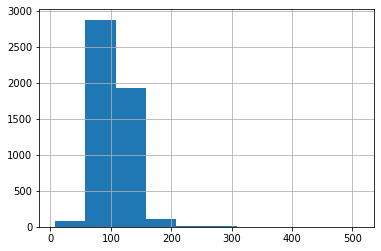

In [27]:
movies_num['duration'].hist()

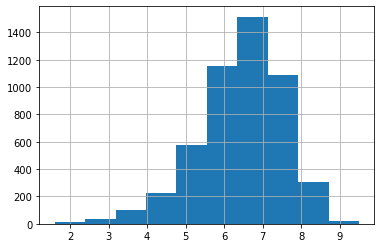

In [28]:
movies_num['imdb_score'].hist()

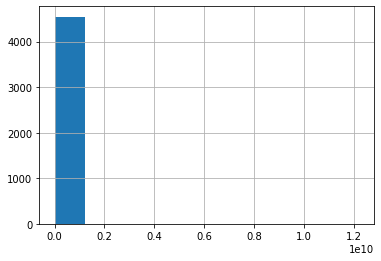

In [29]:
movies_num['budget'].hist()

Vemos que hay una situación bastante atípica en el budget

In [31]:
mask = movies_num['budget']> 1e9
movies[mask]

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
2323,Princess Mononoke,1997.0,Color,1.85,134.0,Japanese,Japan,134.0,Adventure|Animation|Fantasy,PG-13,anime|cult film|forest|princess|studio ghibli,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2710,2.400000e+09,8.4,2298191.0
2334,Steamboy,2004.0,Color,1.85,103.0,Japanese,Japan,103.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,PG-13,19th century|ball|boy|inventor|steam,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,991,2.127520e+09,6.9,410388.0
2988,The Host,2006.0,Color,1.85,110.0,Korean,South Korea,110.0,Comedy|Drama|Horror|Sci-Fi,R,daughter|han river|monster|river|seoul,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,1173,1.221550e+10,7.0,2201412.0
3005,Fateless,2005.0,Color,2.35,134.0,Hungarian,Hungary,134.0,Drama|Romance|War,R,bus|death|gay slur|hatred|jewish,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,11,2.500000e+09,7.1,195888.0
3423,Akira,1988.0,Color,1.85,124.0,Japanese,Japan,124.0,Action|Animation|Sci-Fi,R,based on manga|biker gang|gifted child|post th...,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,28,1.100000e+09,8.1,439162.0
3859,Lady Vengeance,2005.0,Color,2.35,112.0,Korean,South Korea,112.0,Crime|Drama,R,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,907,4.200000e+09,7.7,211667.0


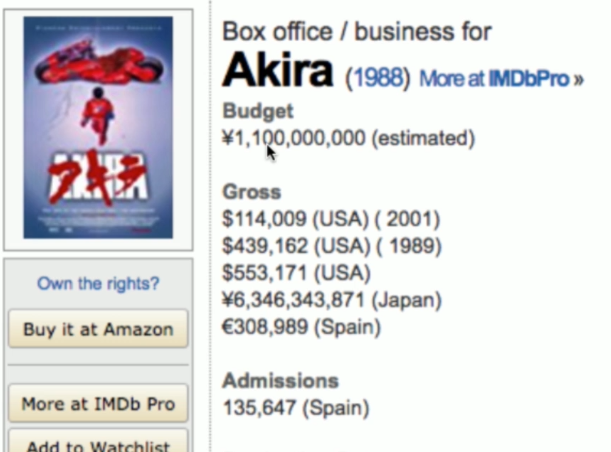

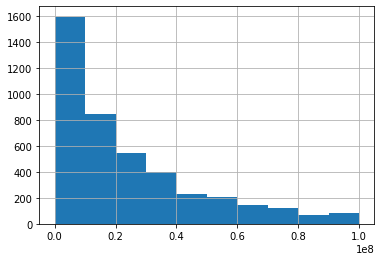

In [32]:
movies.budget[movies_num['budget']<= 1e8].hist()

In [33]:
new_movies=pd.read_csv('https://raw.githubusercontent.com/garzuzo/ai-talk/main/datasets/X_opening.csv')

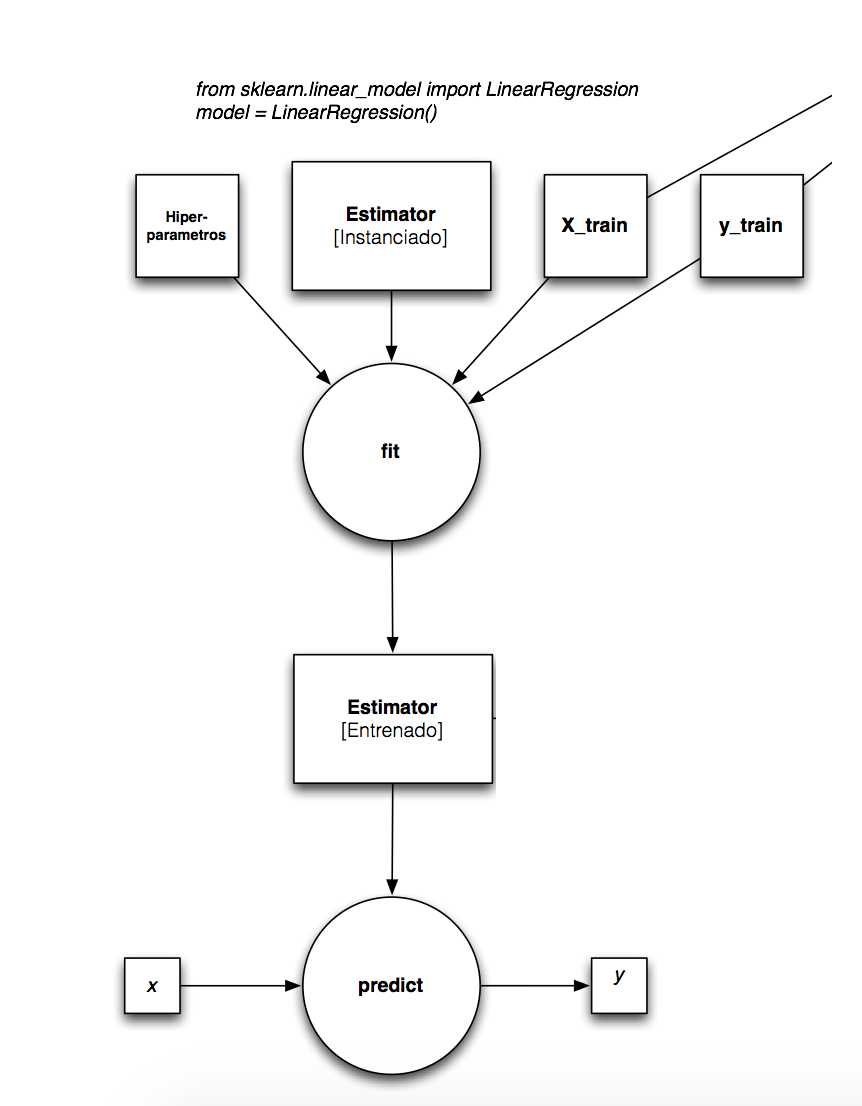

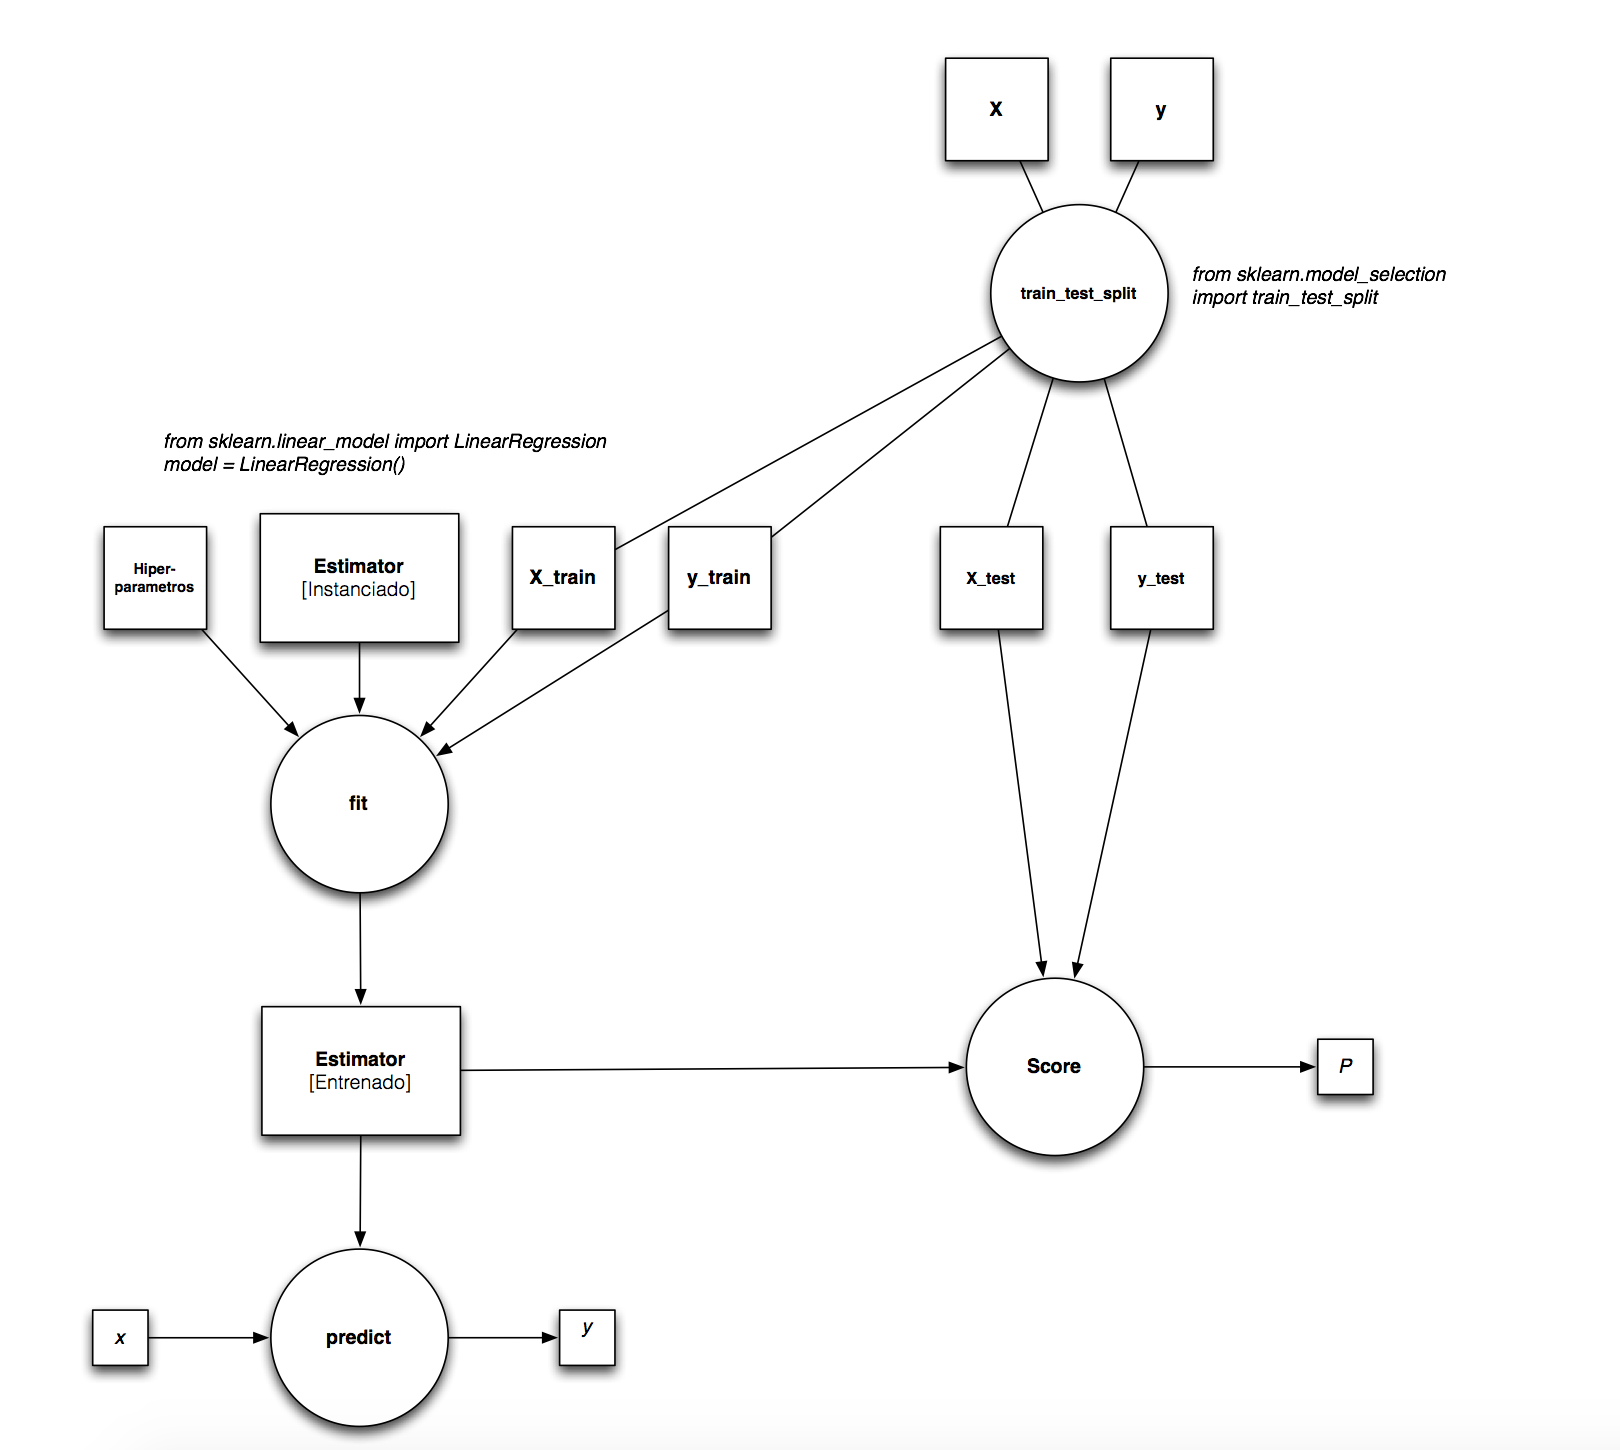

In [34]:
new_movies

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
0,425000000.0,2.783919e+09,2009.0,1.780000,178.0,4834.0,2.370000e+08,7.9,77025481.0,3452.0
1,300000000.0,9.634204e+08,2007.0,2.350000,169.0,48350.0,3.000000e+08,7.1,139802190.0,4362.0
2,300000000.0,8.796209e+08,2015.0,2.350000,148.0,11700.0,2.450000e+08,6.8,70403148.0,3929.0
3,275000000.0,1.084439e+09,2012.0,2.350000,164.0,106759.0,2.500000e+08,8.5,160887295.0,4404.0
4,275000000.0,2.600021e+08,2013.0,2.350000,150.0,45757.0,2.150000e+08,6.5,29210849.0,3904.0
...,...,...,...,...,...,...,...,...,...,...
2216,10800000.0,2.862544e+06,2006.0,2.350000,118.0,378.0,1.500000e+07,6.4,28298.0,6.0
2217,10600000.0,2.613640e+05,2013.0,2.350000,98.0,2271.0,7.000000e+06,5.5,4608.0,3.0
2218,10500000.0,1.414040e+07,2007.0,2.350000,97.0,20312.0,1.000000e+07,6.5,4712341.0,2155.0
2219,10100000.0,1.872630e+07,2010.0,2.157506,144.0,1121.0,5.329615e+07,5.3,642156.0,82.0


In [35]:
y= new_movies['worldwide_gross']

In [36]:
X=new_movies.drop('worldwide_gross', axis=1)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4)

In [39]:
print(len(X))
print(len(X_train))
print(len(X_test))

2221
1332
889


In [40]:
from sklearn.linear_model import Lasso

model = Lasso()

In [41]:
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2582863319091077e+18, tolerance: 5330980803217915.0
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [42]:
predicted = model.predict(X_test)

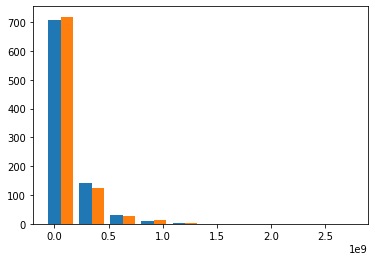

In [43]:
plt.hist([predicted, y_test]);

El **Score R2** de una regresión es una de las formas más comunes de entender su poder predictivo. Entre más cerca de 1, mejor

In [47]:
model.score(X_test, y_test)

0.7516666105223109